<a href="https://colab.research.google.com/github/arumm25/Repo1-PenambanganData/blob/main/Eksperimen_AkhirFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib


In [3]:
path = "/content/drive/MyDrive/Penambangan Data/databeasiswa.csv"
df = pd.read_csv(path)

df.head()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak *
0,1,0.75,0.74,0
1,2,1.25,1.16,0
2,3,0.67,1.69,0
3,4,2.47,3.19,1
4,5,3.54,2.45,1


In [4]:
df.isnull().sum()


,0
Mahasiswa,0
IPK,0
Tingkat Kemiskinan (TM),0
Beasiswa/Tidak *,0


In [6]:
encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [8]:
X = df.drop('Beasiswa/Tidak *', axis=1)
y = df['Beasiswa/Tidak *']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy KNN:", acc_knn)


Accuracy KNN: 1.0


In [19]:
cv_knn = cross_val_score(
    knn,
    X_scaled,
    y,
    cv=5,
    scoring='accuracy'
)

print("CV KNN:", cv_knn)
print("Rata-rata CV KNN:", cv_knn.mean())


CV KNN: [1. 1. 1. 1. 1.]
Rata-rata CV KNN: 1.0


In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [20]:
import pandas as pd

hasil = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy (Split)': [accuracy, acc_knn],
})

hasil


,Model,Accuracy (Split)
0,Logistic Regression,1.0
1,KNN,1.0


In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[3 0]
 [0 2]]


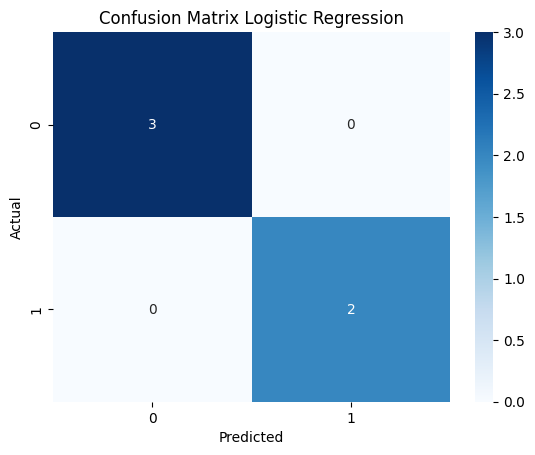

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression")
plt.show()


In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [15]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_scaled,
    y,
    cv=kfold,
    scoring='accuracy'
)

print("Akurasi tiap fold:", cv_scores)
print("Rata-rata akurasi:", cv_scores.mean())


Akurasi tiap fold: [1. 1. 1. 1. 1.]
Rata-rata akurasi: 1.0


In [17]:
import os

output_dir = '/content/drive/MyDrive/DataMining/'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(model, os.path.join(output_dir, 'model_beasiswa.pkl'))
joblib.dump(scaler, os.path.join(output_dir, 'scaler_beasiswa.pkl'))

print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!
